## Task- 01
## "Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms"

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("/Users/mac/Desktop/CSV.FILE/Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
df1 = df[['area','bedrooms','bathrooms','price']]

In [6]:
df1.head()

,area,bedrooms,bathrooms,price
0,7420,4,2,13300000
1,8960,4,4,12250000
2,9960,3,2,12250000
3,7500,4,2,12215000
4,7420,4,1,11410000


### Missing Value

In [7]:
df1.isnull()

,area,bedrooms,bathrooms,price
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
540,False,False,False,False
541,False,False,False,False
542,False,False,False,False
543,False,False,False,False


In [8]:
df1.isnull().sum()

area         0
bedrooms     0
bathrooms    0
price        0
dtype: int64

### One Hot Encoding

In [9]:
ohe = OneHotEncoder(handle_unknown='ignore',drop = 'first')

### Exploratory Data Analysis (EDA)

In [10]:
df1.dtypes

area         int64
bedrooms     int64
bathrooms    int64
price        int64
dtype: object

### Plot Histogram

(array([[  0.,  48., 171., 160.,  92.,  37.,  25.,   6.,   2.,   4.],
        [545.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [545.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [545.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([1.00000000e+00, 1.33000090e+06, 2.66000080e+06, 3.99000070e+06,
        5.32000060e+06, 6.65000050e+06, 7.98000040e+06, 9.31000030e+06,
        1.06400002e+07, 1.19700001e+07, 1.33000000e+07]),
 <a list of 4 BarContainer objects>)

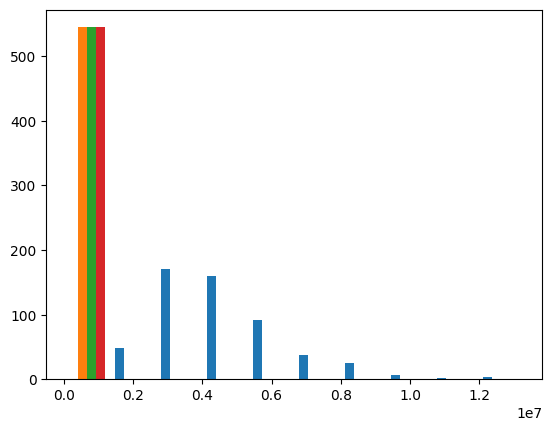

In [11]:
plt.hist(df1[['price','area','bedrooms','bathrooms']])

### Plot HeatMap 

In [12]:
correlation = df1[['price','area','bedrooms','bathrooms']].corr()

<Axes: >

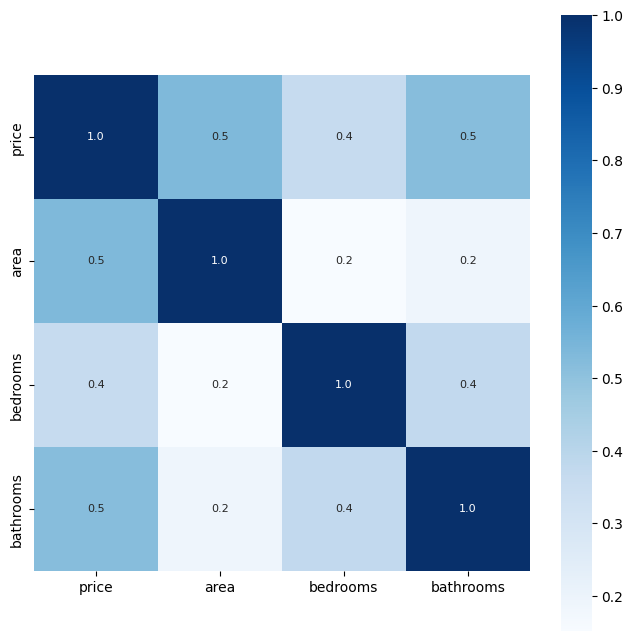

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [14]:
#Encode Categorical Variables
categorical_columns = df1.select_dtypes(include=['object']).columns


In [15]:
for col in categorical_columns:
    print(f"Encoding column: {col}")
    label_encoder = LabelEncoder()
    df1[col] = label_encoder.fit_transform(df[col])


In [16]:
# Feature Engineering
df1['rooms_per_area'] = df['bedrooms'] / df['area']
df1['bathrooms_per_bedroom'] = df['bathrooms'] / df['bedrooms']
df1['total_rooms'] = df['bedrooms'] + df['bathrooms']
df1['price_per_area'] = df['price'] / df['area']
df1['price_per_room'] = df['price'] / (df['bedrooms'] + df['bathrooms'])

/var/folders/ht/hwy7z71n6bv_z2tjct442jk00000gn/T/ipykernel_1090/764341288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['rooms_per_area'] = df['bedrooms'] / df['area']
/var/folders/ht/hwy7z71n6bv_z2tjct442jk00000gn/T/ipykernel_1090/764341288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bathrooms_per_bedroom'] = df['bathrooms'] / df['bedrooms']
/var/folders/ht/hwy7z71n6bv_z2tjct442jk00000gn/T/ipykernel_1090/764341288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [17]:
# Replace infinite values and handle missing data
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.dropna(inplace=True)


/var/folders/ht/hwy7z71n6bv_z2tjct442jk00000gn/T/ipykernel_1090/2608148492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/ht/hwy7z71n6bv_z2tjct442jk00000gn/T/ipykernel_1090/2608148492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [18]:
#Define Features and Target
X = df1[['area', 'bedrooms', 'bathrooms', 
        'rooms_per_area', 'bathrooms_per_bedroom', 
        'total_rooms', 'price_per_area', 'price_per_room']]
y = df1['price']


In [19]:
# Ensure data types are numeric
print("Feature data types:")
print(X.dtypes)
print("Target data type:")
print(y.dtypes)

Feature data types:
area                       int64
bedrooms                   int64
bathrooms                  int64
rooms_per_area           float64
bathrooms_per_bedroom    float64
total_rooms                int64
price_per_area           float64
price_per_room           float64
dtype: object
Target data type:
int64


In [20]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
#Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [22]:
#Evaluate the Model
y_pred = model.predict(X_test)

print("\nModel Performance:")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")



Model Performance:
R² Score: 0.97
Mean Absolute Error: 259384.31
Root Mean Squared Error: 408301.32


### Visualizing the Actual prices vs Predicted prices

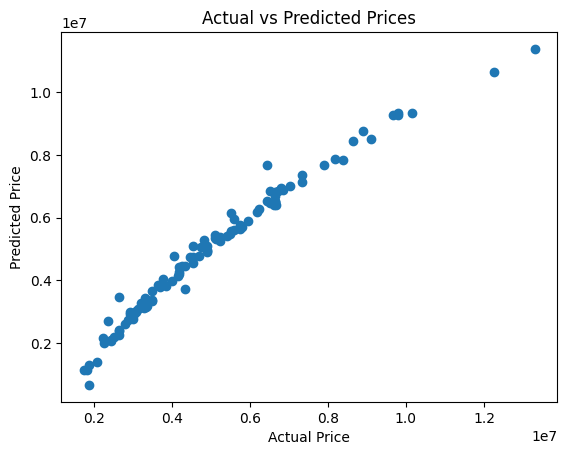

In [23]:
# Scatter plot: Actual vs Predicted Prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


### Making Regression System

In [24]:
df1.head(1)

,area,bedrooms,bathrooms,price,rooms_per_area,bathrooms_per_bedroom,total_rooms,price_per_area,price_per_room
0,7420,4,2,13300000,0.000539,0.5,6,1792.45283,2.216667e+06


In [26]:
# Assuming the trained model is called 'model' and the scaler (if used) is 'scaler'

# Sample column names for user reference
columns = ["area", "bedrooms", "bathrooms","rooms_per_area","bathrooms_per_area","total_rooms","price_per_area","price_per_room"]

def get_user_input():
    """Collects user input for prediction."""
    print("Enter the values for the following features:")
    user_data = []
    for col in columns:
        value = float(input(f"{col}: "))
        user_data.append(value)
    return np.array(user_data).reshape(1, -1)

def predict_price():
    """Predicts house price based on user input."""
    user_input = get_user_input()

    # If feature scaling was applied during training, apply it here as well
    # Example: user_input = scaler.transform(user_input)
    
    predicted_price = model.predict(user_input)
    print(f"\nPredicted House Price: {predicted_price[0]:,.2f}")

# Run the system
if __name__ == "__main__":
    predict_price()


Enter the values for the following features:


area:  7420
bedrooms:  4
bathrooms:  2
rooms_per_area:  0.000539	
bathrooms_per_area:  0.5
total_rooms:  6
price_per_area:  1792.45283
price_per_room:  2.216667e+06



Predicted House Price: 11,380,375.28


/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##                            THANK YOU